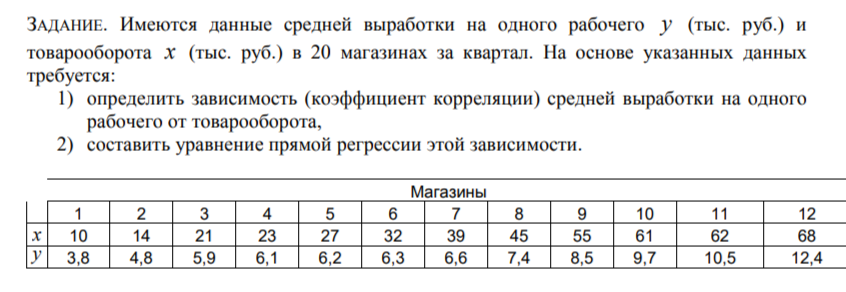

In [ ]:
#Создаем датафрейм

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats


data = {
    'x': [10, 14, 21, 23, 27, 32, 39, 45, 55, 61, 62, 68],
    'y': [3.8, 4.8, 5.9, 6.1, 6.2, 6.3, 6.6, 7.4, 8.5, 9.7, 10.5, 12.4]
}
df = pd.DataFrame(data)


Сначала проверим данные на нормальность. Это не обязательно при регрессионном анализе, но улучшает эффективность. Также заодно посмотрим на наличие выбросов,
тк их отстутвие обязательно для объективности корреляции

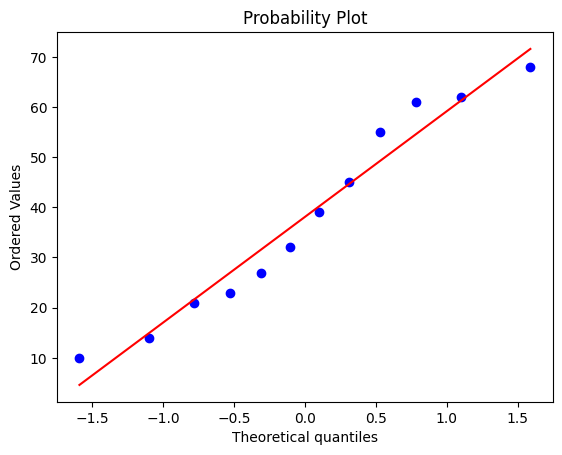

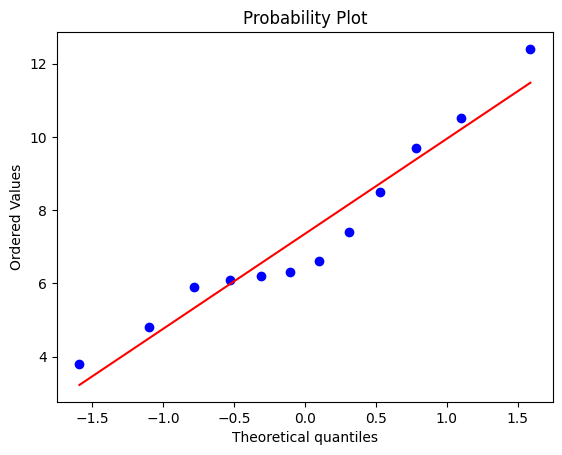

Не можем отвергнуть H0 по x, а значит допускаем, что x распределен номально 
Не можем отвергнуть H0 по y, а значит допускаем, что y распределен номально 


In [6]:
# графически
stats.probplot(df.x, dist= 'norm', plot=plt)
plt.show()
stats.probplot(df.y, dist= 'norm', plot=plt)
plt.show()
#проверка нормальности тестом Шапиро - Уилка, где нулевая гипотеза: данные имеют нормальное распределение
f, p_value_x = stats.shapiro(df.x)
f, p_value_y = stats.shapiro(df.y)
if p_value_x > 0.05:
  print('Не можем отвергнуть H0 по x, а значит допускаем, что x распределен номально ')
if p_value_y > 0.05:
  print('Не можем отвергнуть H0 по y, а значит допускаем, что y распределен номально ')



Проверим является ли связь между X и Y линейной

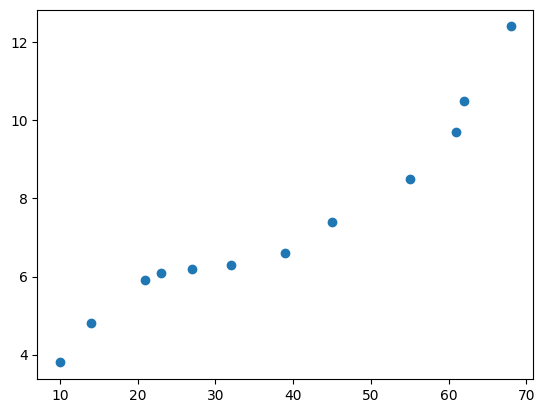

In [7]:
plt.plot(df.x, df.y, 'o')
plt.show()
# заметим, что связь отличается от линейной, значит это приведет к тому что коэфицент детерминации будет ниже , т е понизится эффективность модели

Найдем коэфцицент пирсона

In [8]:
print(df.x.corr(df.y))

0.9591225658745699


Построим саму модель и найдем slope и itersept


In [9]:
model =smf.ols('y ~ x', data= df).fit()
print(model.params)


Intercept    2.795147
x            0.119602
dtype: float64


Дополнительная визуализация

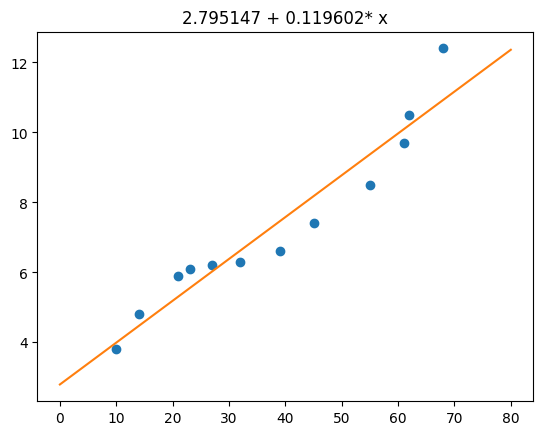

In [12]:
x = np.linspace(0, 80, 10)
y = 2.795147 + 0.119602* x
plt.plot(df.x, df.y, 'o')
plt.plot(x,y )
plt.title('2.795147 + 0.119602* x')
plt.show()

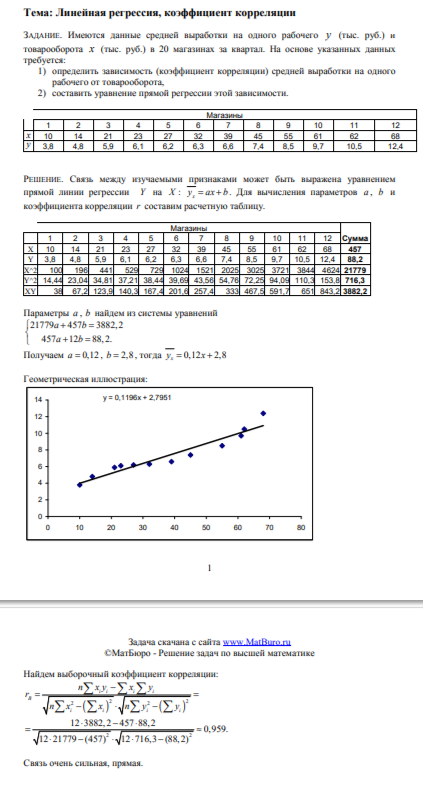